In [2]:
MAIN_PATH = "/home/carlos/MasterDS/tfm"
JSON_DATA_PATH = '{}/data/json/'.format(MAIN_PATH)
CSV_DATA_PATH = '{}/data/csv/'.format(MAIN_PATH)

In [3]:
import sys
sys.path.insert(0, MAIN_PATH)

In [4]:
%load_ext autoreload
%autoreload 2
from scripts.models.ltr.train import LTRTrain
from scripts.models.ltr.metrics import LTRMetrics

%reload_ext autoreload

# Entrenamiento

In [16]:
ltr_params = {
    'key_events': ['goal', 'red_card', 'penalty'],
    'lags': [1, 3, 5],
    'target_metric': 'rouge',
    'drop_teams': True,
    'lemma': True,
    'metric_params': {'rouge_mode': 'rouge-1', 'rouge_metric': 'r'},
    'count_vec_kwargs': {'ngram_range': (1, 2), 'strip_accents': 'unicode'}
}
cat_features_dict = {'is_key_event': [0, 1]}
num_features = ['tfidf_sum']
model_params = {
    'n_estimators': 100,
    'max_depth': 2,
    'bootstrap': True,  
}

In [19]:
# Uncomment if using cv

model_params = {
    'n_estimators': [100, 200, 500],
    'max_depth': [2, 5, 7],
    'bootstrap': [True],
    
}
cv = 5
opt_metric = 'neg_mean_squared_error'
ltr_train = LTRTrain(cat_features_dict=cat_features_dict, num_features=num_features,
                     model_params=model_params, ltr_params=ltr_params,
                    cv=cv, opt_metric=opt_metric)


Setting target metric to rouge


In [5]:
ltr_train = LTRTrain(cat_features_dict=cat_features_dict, num_features=num_features,
                     model_params=model_params, ltr_params=ltr_params)

Setting target metric to rouge


In [20]:
%%time
ltr_train.train()

Reading /home/carlos/MasterDS/tfm/data/csv/summaries/ltr/features_targets/341d2aa93d/train.csv
Categorizing n_players...
Computing new length...
Dropping {'url', 'equalize', 'total_length', 'length', 'sim_previous_3', 'n_players_cat', 'n_players', 'sentence_ix', 'advantage', 'event_ix', 'players_importance', 'sim_previous_5', 'sim_previous_1', 'n_stop', 'json_file', 'position', 'score'}
Using cv with 5 folds optimizing neg_mean_squared_error
Training model...
Writing model to /home/carlos/MasterDS/tfm/models/ltr_random_forest/e795a8590d/ckpt.pickle
Writing model info to /home/carlos/MasterDS/tfm/models/ltr_random_forest/e795a8590d/model_info.pickle
CPU times: user 1min, sys: 200 ms, total: 1min
Wall time: 11min 58s


## Salida

In [21]:
model = ltr_train.read_model()

In [22]:
model

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(categories=[[0,
                                                                                              1]],
                                                                                 drop='first'))]),
                                                  ['is_key_event'])])),
                ('model',
                 GridSearchCV(cv=5,
                              estimator=RandomForestRegressor(random_state=10),
                              n_jobs=5,
                              param_grid={'bootstrap': [True],
                                          'max_depth': [2, 5, 7],
                                          'n_estimators': [100, 200, 500]},
                 

In [23]:
model_info = ltr_train.read_model_info()

El número de jugadores no aporta nada

In [24]:
# La salida de mse de una etapa de cv en sklearn es negativa
model_info

{'best_score': -0.014982057498247606,
 'best_params': {'bootstrap': True, 'max_depth': 7, 'n_estimators': 200},
 'model_out':            Gini-importance
 x0_1              0.205634
 tfidf_sum         0.794366}

In [25]:
model_info['model_out']

,Gini-importance
x0_1,0.205634
tfidf_sum,0.794366


## Métricas

In [26]:
ltr_metrics = LTRMetrics(ltr_train)

In [27]:
ltr_metrics.run()

Computing metric for train dataset
Reading /home/carlos/MasterDS/tfm/data/csv/summaries/ltr/features_targets/341d2aa93d/train.csv
Categorizing n_players...
Computing new length...
Dropping {'url', 'equalize', 'total_length', 'length', 'sim_previous_3', 'n_players_cat', 'n_players', 'sentence_ix', 'advantage', 'event_ix', 'players_importance', 'sim_previous_5', 'sim_previous_1', 'n_stop', 'json_file', 'position', 'score'}
Writing metrics to /home/carlos/MasterDS/tfm/models/ltr_random_forest/e795a8590d/train_metrics.pickle
Computing metric for validation dataset
Reading /home/carlos/MasterDS/tfm/data/csv/summaries/ltr/features_targets/341d2aa93d/validation.csv
Categorizing n_players...
Computing new length...
Dropping {'url', 'equalize', 'total_length', 'length', 'sim_previous_3', 'n_players_cat', 'n_players', 'sentence_ix', 'advantage', 'event_ix', 'players_importance', 'sim_previous_5', 'sim_previous_1', 'n_stop', 'json_file', 'position', 'score'}
Writing metrics to /home/carlos/Master

Reading metrics from /home/carlos/MasterDS/tfm/models/ltr_random_forest/e795a8590d/train_metrics.pickle
mse : 0.01488674056246562
mae : 0.08314544531822443
r2 : 0.20087103897740344


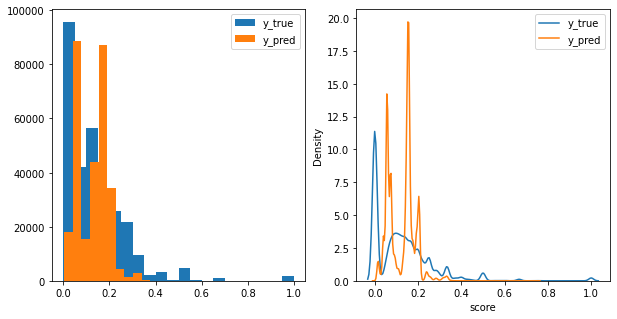

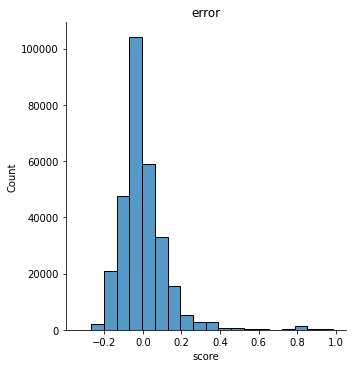

In [28]:
ltr_metrics.show_metrics('train')

Reading metrics from /home/carlos/MasterDS/tfm/models/ltr_random_forest/e795a8590d/validation_metrics.pickle
mse : 0.014774841692806769
mae : 0.08321565287430925
r2 : 0.19764988765207592


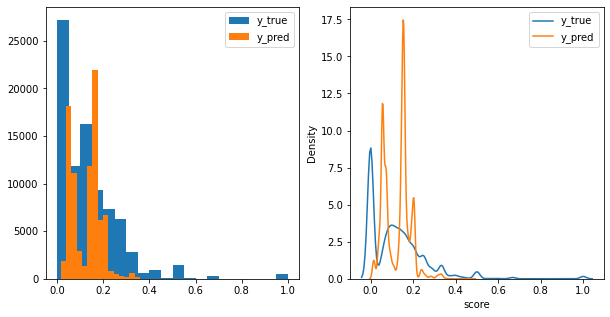

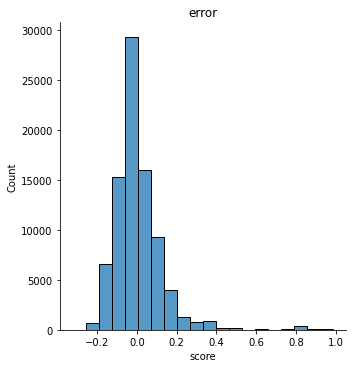

In [29]:
ltr_metrics.show_metrics('validation')